<a href="https://colab.research.google.com/github/aditya1-dot/Churn-Prediuction-Ecommerce/blob/main/Walmart_churn_detector_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load the dataset
data = pd.read_csv('data.csv')
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [6]:
# Cleaning the data
data['Tenure'] = data['Tenure'].fillna(int(data['Tenure'].mean()))
data['HourSpendOnApp'] = data['HourSpendOnApp'].fillna(data['HourSpendOnApp'].mean())
data['NumberOfDeviceRegistered'] = data['NumberOfDeviceRegistered'].fillna(data['NumberOfDeviceRegistered'].mean())
data['SatisfactionScore'] = data['SatisfactionScore'].fillna(data['SatisfactionScore'].mean())
data['NumberOfAddress'] = data['NumberOfAddress'].fillna(data['NumberOfAddress'].mean())
data['Complain'] = data['Complain'].fillna(0)  # Assuming missing values indicate no complaint
data['DaySinceLastOrder'] = data['DaySinceLastOrder'].fillna(data['DaySinceLastOrder'].mean())
data['CouponUsed'] = data['CouponUsed'].fillna(0)
# assuming missing values indicate no coupon used.
data['WarehouseToHome'] = data['WarehouseToHome'].fillna(data['WarehouseToHome'].mean())
data['OrderAmountHikeFromlastYear'] = data['OrderAmountHikeFromlastYear'].fillna(0)
# assuming no hike
data['OrderCount'] = data['OrderCount'].fillna(data['OrderCount'].mean())
data["DaySinceLastOrder"]=data["DaySinceLastOrder"].fillna(data["DaySinceLastOrder"].mean())






In [7]:
data.head(50);

In [8]:
# Handling categorical variables
categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
for col in categorical_columns:
    data[col] = data[col].str.strip()  # Remove leading/trailing spaces

# Convert categorical variables to numeric using label encoding
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Handling potential outliers
data = data[data['OrderAmountHikeFromlastYear'] <= 100]  # Assuming a reasonable upper limit
data = data[data['CashbackAmount'] <= 500]  # Assuming a reasonable upper limit

# Save the cleaned dataset
data.to_csv('cleaned_dataset.csv', index=False)

In [9]:
c_data=pd.read_csv("cleaned_dataset.csv")

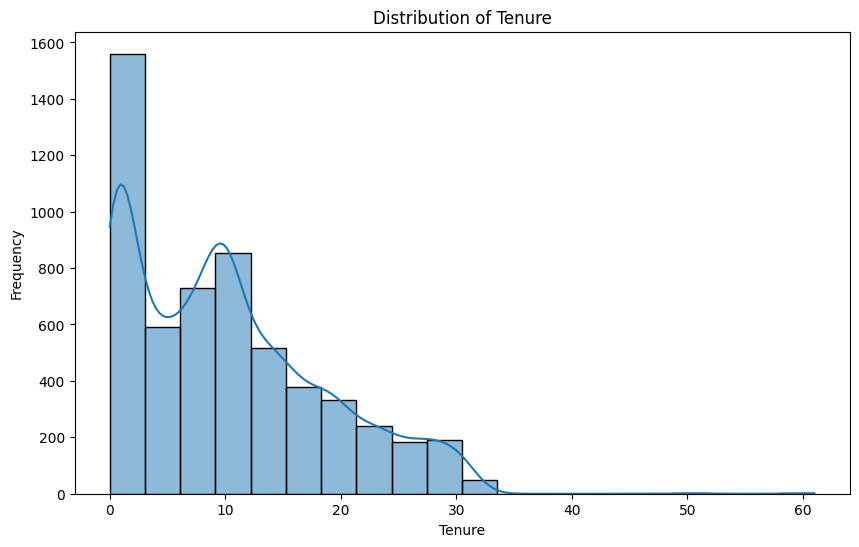

In [10]:
# Plotting the histogram for 'Tenure'
plt.figure(figsize=(10, 6))
sns.histplot(c_data['Tenure'], bins=20, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

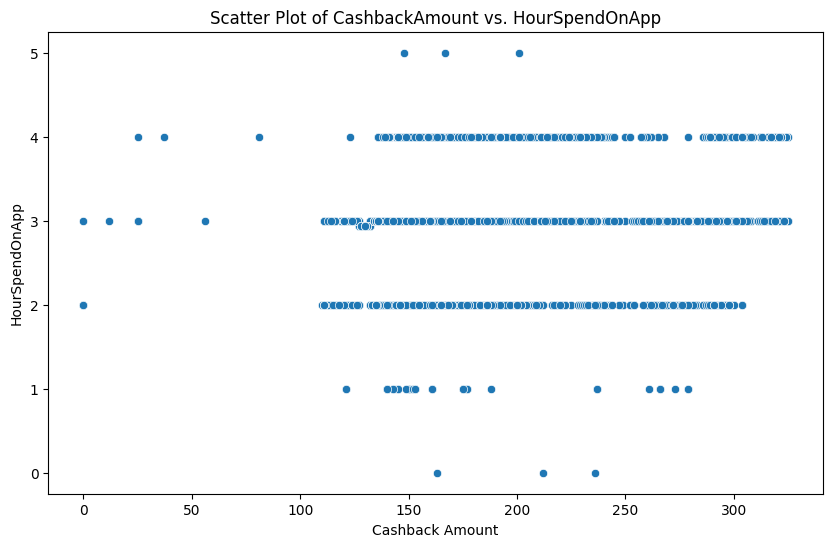

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CashbackAmount', y='HourSpendOnApp', data=c_data)
plt.title('Scatter Plot of CashbackAmount vs. HourSpendOnApp')
plt.xlabel('Cashback Amount')
plt.ylabel('HourSpendOnApp')
plt.show()

In [12]:
c_data.head(20)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,1,3,6.0,4,0,3.000000,3,2,2,2,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,10.0,2,1,8.0,6,1,3.000000,4,3,3,2,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,10.0,2,1,30.0,4,1,2.000000,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,2,3,15.0,4,1,2.000000,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,2,1,12.0,0,1,2.931535,3,3,5,2,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,0,1,22.0,4,0,3.000000,5,4,5,2,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,10.0,2,3,11.0,2,1,2.000000,3,2,2,0,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,10.0,2,1,6.0,0,1,3.000000,3,3,2,0,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,2,3,9.0,5,1,2.931535,4,3,3,0,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,10.0,2,1,31.0,4,1,2.000000,5,3,3,2,2,0,12.0,1.0,1.0,1.0,123


In [13]:
c_data['PreferredLoginDevice'] = LabelEncoder().fit_transform(c_data['PreferredLoginDevice'])
c_data['PreferredPaymentMode'] = LabelEncoder().fit_transform(c_data['PreferredPaymentMode'])
c_data['Gender'] = LabelEncoder().fit_transform(c_data['Gender'])
c_data['PreferedOrderCat'] = LabelEncoder().fit_transform(c_data['PreferedOrderCat'])
c_data['MaritalStatus'] = LabelEncoder().fit_transform(c_data['MaritalStatus'])

X = c_data.drop(columns=['CustomerID', 'Churn'])
y = c_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Model training with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

In [15]:
# Model evaluation
y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("accuracy is :",accuracy*100)
print("Best Model Parameters:", grid_search.best_params_)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


accuracy is : 98.22380106571936
Best Model Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Confusion Matrix:
 [[941   0]
 [ 20 165]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       941
           1       1.00      0.89      0.94       185

    accuracy                           0.98      1126
   macro avg       0.99      0.95      0.97      1126
weighted avg       0.98      0.98      0.98      1126



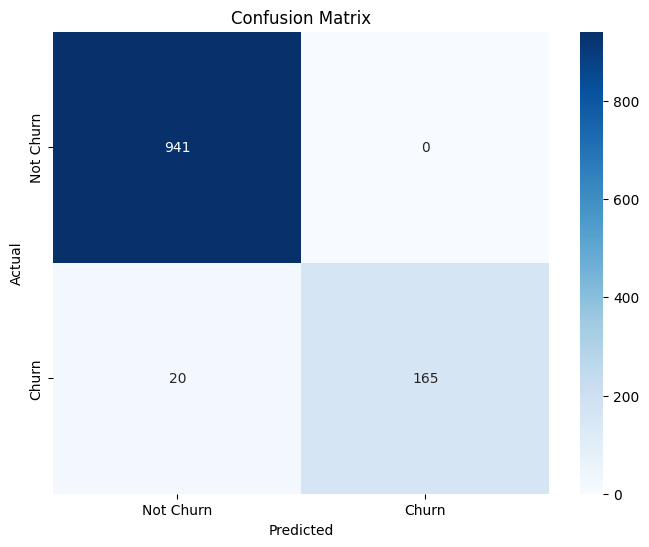

In [16]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

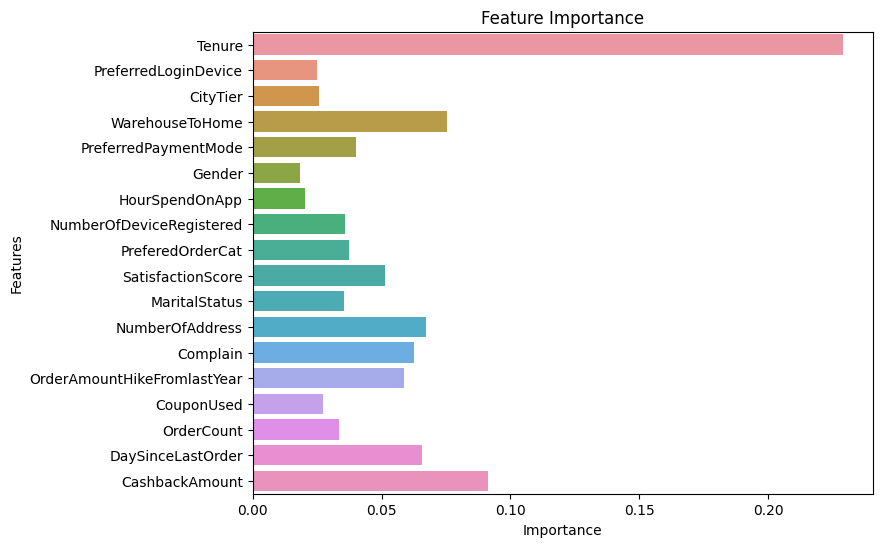

In [17]:
# Feature importance analysis
feature_importance = best_model.feature_importances_
feature_names = X.columns.tolist()

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [18]:
# Interpretability and actionable insights
important_features = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
important_features = important_features.sort_values(by='Importance', ascending=False)

top_features = important_features.head(2)['Feature'].tolist()
print("Top 2 important features:", top_features)


Top 2 important features: ['Tenure', 'CashbackAmount']


In [19]:
# Identify high-risk customers
X_test['predicted_churn'] = y_pred
high_risk_customers = X_test[X_test['predicted_churn'] == 1][top_features]

print("High-risk customers:\n", high_risk_customers)

High-risk customers:
       Tenure  CashbackAmount
4331     1.0             148
911      0.0             137
80       0.0             176
290      0.0             124
4456     1.0             139
...      ...             ...
3554     5.0             146
5439     8.0             148
803      7.0             180
2145     0.0             126
4160     5.0             185

[165 rows x 2 columns]


In [20]:
# Separate the last 5 rows for prediction
user_data_last_5 = c_data.iloc[-5:].drop(columns=['CustomerID', 'Churn'])

# Load the scaler (from the previous code snippet)
scaler = StandardScaler()

# Preprocess the user input
user_data_last_5_scaled = scaler.fit_transform(user_data_last_5)

# Predict churn for the last 5 rows
churn_predictions = grid_search.predict(user_data_last_5_scaled)

for i, prediction in enumerate(churn_predictions):
    if prediction == 0:
        prediction_result = "Not Churn"
    else:
        prediction_result = "Churn"
    print(f"Predicted Churn for entry {i+1}: {prediction_result}")

Predicted Churn for entry 1: Not Churn
Predicted Churn for entry 2: Not Churn
Predicted Churn for entry 3: Not Churn
Predicted Churn for entry 4: Not Churn
Predicted Churn for entry 5: Not Churn
